to solve classfication problem we use logistic regression.
we use sigmaoid function.

performance metrics:
1. confusion matrix
2. accuracy
3. precision
4. recall
5. f-beta score

In [2]:
# step01: importing libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
     accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# step02: create binary classification dataset
X,Y=make_classification(n_samples=1000,n_classes=2,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(X)

[[-0.6693561  -1.49577819 -0.87076638 ... -1.26733697 -1.2763343
   1.01664321]
 [ 0.09337237  0.78584826  0.10575379 ... -0.12270893  0.6934308
   0.91136272]
 [-0.90579721 -0.60834121  0.29514098 ...  0.83049813 -0.73733198
  -0.5782121 ]
 ...
 [-0.20013455 -1.46108168  1.79701652 ... -1.50280171 -1.27473745
   1.60111869]
 [ 0.03935575  0.24868361 -0.47532342 ...  0.09912579  0.54269228
   1.20827474]
 [ 0.76921528  0.47076539  0.16994471 ...  0.6561162   0.64333186
  -2.02100232]]


In [4]:
# step03: train logistic regression model.....
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [5]:
# step04: predict class labels
Y_pred = model.predict(X_test)

In [6]:
# step05: predict probailities for class 1 (needed for ROC curve)
Y_probs = model.predict_proba(X_test)[:, 1]

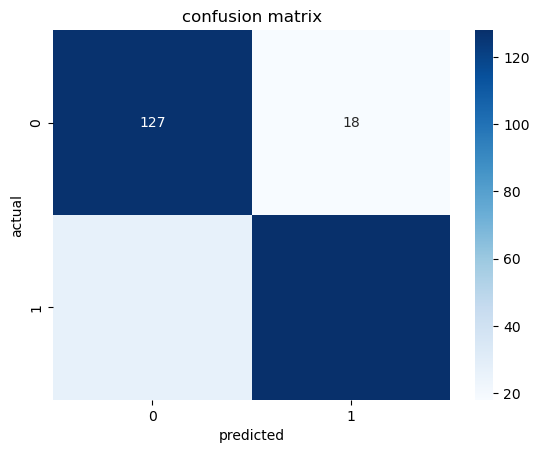

In [7]:
# step06: confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt= 'd', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [8]:
# step07: logistic regression performance metrics.....
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_probs))

Accuracy: 0.85
Precision: 0.8767123287671232
Recall: 0.8258064516129032
F1 Score: 0.8504983388704319
ROC AUC Score: 0.9141713014460511


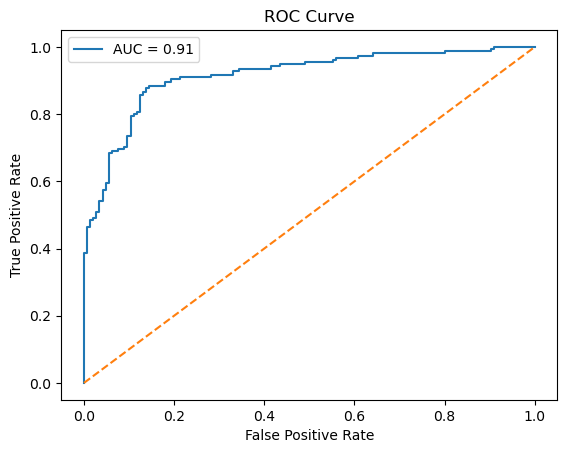

In [10]:
# step08: curves 
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(Y_test, Y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Line representing random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()